In [41]:
import numpy as np
import matplotlib.pyplot as plt
import tracemalloc
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['figure.dpi'] = 100 

# Question 1a

$\int_0^1 e^\left(5x\right) dx$

In [42]:
def calculate_exact_integral():
    # Calculate the exact integral using the analytical solution
    I_exact = (np.exp(5) - np.exp(0)) / 5
    return I_exact

# Calculate the exact integral
I_exact = calculate_exact_integral()
print("Exact integral (I_exact):", I_exact)

Exact integral (I_exact): 29.48263182051532


From $\texttt{Wolfram Alpha}$ also, we have the value of the integral computed as: $29.48263182051532$

### Defining the function

In [43]:
def f(x):
    return np.exp(5 * x)

### Calculating the integral using Trapezoidal rule

The Trapezoid Rule approximates the integral by partitioning the interval into subintervals and calculating the area of a trapezoid within each subinterval. The total integral is estimated by summing up these trapezoidal areas. Specifically, within each subinterval, the Trapezoid Rule computes the area of a trapezoid using the interval's endpoints as corners. In summary, the Trapezoid Rule approximates integrals by considering the areas of trapezoids within individual subintervals.
$\int_a^b f(x) d x \approx \frac{h}{2}\left(f\left(x_0\right)+2\left(\sum_1^{n-1} f\left(x_i\right)\right)+f\left(x_{i+1}\right)\right)$

In [44]:
def trap_int(f, a=0, b=1, e=1e-10):
    """
    Compute the integral of a function using the trapezoidal rule.

    Parameters:
    f (callable): The function to be integrated.
    a (float): The lower limit of integration.
    b (float): The upper limit of integration.
    e (float): The tolerance for the error.

    Returns:
    float: Approximate integral using the trapezoidal rule.
    """
    # Initial step size
    h = (b - a)
    I_prev = 0

    # Iterate until the error is within the tolerance
    while True:
        N = int((b - a) / h)
        I = 0.5 * (f(a) + f(b))  # Initialize the integral

        # Calculate the trapezoidal rule
        for i in range(1, N):
            I += f(a + i * h)

        I *= h

        # Check for convergence based on tolerance
        if abs(I - I_prev) < e:
            return I

        # Update values for the next iteration
        I_prev = I
        h /= 2

In [51]:
%%time
tracemalloc.start()
result = trap_int(f)
print("Approximate integral by Trapezoidal Integration:", result)
print('Percentage error with respect to calculated I_exact =', (I_exact-result)*100/result)
print("Memory Usage by Trapezoidal Integration(current, peak): ", tracemalloc.get_traced_memory())
tracemalloc.stop()

Approximate integral by Trapezoidal Integration: 29.482631820529747
Percentage error with respect to calculated I_exact = -4.893582885488002e-11
Memory Usage by Trapezoidal Integration(current, peak):  (297764, 298036)
CPU times: total: 14.7 s
Wall time: 40.2 s


### Calculating the integral using the Simpson Rule

In Simpson’s 1/3 Rule, parabolas are used to approximate each part of the curve. The area into n equal segments of width $\Delta x$. First a value is selected for the number of steps, which is the number of parts the interval is divided into. Then, the width, $h=(b-a) / n$ is calculated. Then, the values of $x_0$ to $x_n$ are calculated as $x_0=a_r x_1=x_0+h_1 \ldots . x_{n-1}=x_{n-2}+h, x_n=b$. Considering $y=f(x)$, the values of $y\left(y_0\right.$ to $\left.y_n\right)$ are found for the corresponding steps. Finally, all the previously found values are substituted into the Simpson's Rule Formula to calculate the integral value. The integral's approximate value is determined by Simpson's Rule:
$$
\int_a^b f(x) d x \approx \frac{h}{3}\left(f\left(x_0\right)+f\left(x_n\right)+4\left(\sum_{1,3, \ldots}^{n-1}+2 f\left(x_i\right) \sum_{2,4, \ldots}^{n-2} f\left(x_i\right)\right)\right.
$$.

In [46]:
def simp_int(f, a=0, b=1, e=1e-10):
    """
    Compute the integral of a function using Simpson's rule.

    Parameters:
    f (callable): The function to be integrated.
    a (float): The lower limit of integration.
    b (float): The upper limit of integration.
    e (float): The tolerance for the error.

    Returns:
    float: Approximate integral using Simpson's rule.
    """
    N = 2  # Initial number of intervals (N=2 for Simpson's rule)
    h = (b - a) / N
    I_prev = 0  # Previous estimate of the integral

    while True:
        # Calculate the integral using Simpson's rule
        I = f(a) + f(b)  # Initialize integral

        for i in range(1, N, 2):  # Odd indices
            I += 4 * f(a + i * h)

        for i in range(2, N - 1, 2):  # Even indices (excluding last point)
            I += 2 * f(a + i * h)

        I *= h / 3

        # Check for convergence based on tolerance
        if abs(I - I_prev) < e:
            return I

        # Update values for the next iteration
        I_prev = I
        N *= 2  # Double the number of intervals
        h /= 2  # Halve the step size

In [52]:
%%time
tracemalloc.start()
result = simp_int(f)
print("Approximate integral by Simpson Integration:", result)
print('Percentage error with respect to calculated I_exact =', (I_exact-result)*100/result)
print("Memory Usage by Simpson Integration(current, peak): ", tracemalloc.get_traced_memory())
tracemalloc.stop()

Approximate integral by Simpson Integration: 29.482631820521178
Percentage error with respect to calculated I_exact = -1.9870766259965675e-11
Memory Usage by Simpson Integration(current, peak):  (2067, 2339)
CPU times: total: 31.2 ms
Wall time: 46.3 ms


### Calculating Trapezoidal and Simpson integration for particular values of N

In [48]:
def trapezoidal_rule(f, a, b, N):
    h = (b - a) / N
    integral = (0.5 * f(a)) + (0.5 * f(b))

    for i in range(1, N):
        integral += f(a + i * h)

    integral *= h
    return integral

def simpsons_rule(f, a, b, N):
    h = (b - a) / N
    integral = f(a) + f(b)

    for i in range(1, N):
        if i % 2 == 0:
            integral += 2 * f(a + i * h)
        else:
            integral += 4 * f(a + i * h)

    integral *= h / 3
    return integral

N_values = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
for N in N_values:
    trapezoidal_result = trapezoidal_rule(f, 0, 1, N)
    simpsons_result = simpsons_rule(f, 0, 1, N)
    print(f"N = {N}, Trapezoidal Result = {trapezoidal_result}, Simpsons Result = {simpsons_result}")

N = 2, Trapezoidal Result = 43.444536755995884, Simpsons Result = 33.023855824231745
N = 4, Trapezoidal Result = 33.225124617379095, Simpsons Result = 29.818653904506835
N = 8, Trapezoidal Result = 30.436162274133352, Simpsons Result = 29.5065081597181
N = 16, Trapezoidal Result = 29.72217248676783, Simpsons Result = 29.48417589097932
N = 32, Trapezoidal Result = 29.542589995718938, Simpsons Result = 29.482729165369307
N = 64, Trapezoidal Result = 29.49762593729993, Simpsons Result = 29.482637917826928
N = 128, Trapezoidal Result = 29.486380635678696, Simpsons Result = 29.48263220180496
N = 256, Trapezoidal Result = 29.483569042181553, Simpsons Result = 29.482631844349157
N = 512, Trapezoidal Result = 29.48286612704913, Simpsons Result = 29.482631822004983
N = 1024, Trapezoidal Result = 29.482690397218583, Simpsons Result = 29.482631820608418
N = 2048, Trapezoidal Result = 29.482646464695495, Simpsons Result = 29.48263182052112
N = 4096, Trapezoidal Result = 29.482635481560635, Simpson

### Observations with respect to Computing Time, Accuracy and Memory Usage

It was observed that the Simpson's 1/3 rule took more time and memory than the Trapezoidal rule but the value of the simpson integral was more accurate and it gave a more accurate answer with much less number of interations compared to the Trapezoidal Rule.

# Question 1b

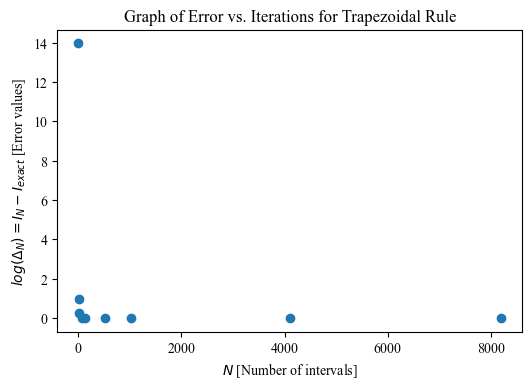

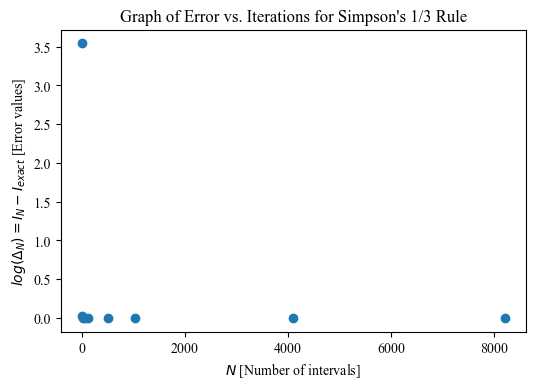

In [49]:
N = [2, 8, 16, 64, 128, 512, 1024, 4096, 8198]
trap_int_error = []
simp_int_error = []

for i in range(len(N)):
    trap_int_error.append(np.abs(I_exact - trapezoidal_rule(f, 0, 1, N[i])))
    simp_int_error.append(np.abs(I_exact - simpsons_rule(f, 0, 1, N[i])))

plt.plot(N, trap_int_error, 'o')
plt.title("Graph of Error vs. Iterations for Trapezoidal Rule")
plt.xlabel("$N$ [Number of intervals]")
plt.ylabel("$log(\Delta_N) = I_N - I_{exact}$ [Error values]")
plt.show()

plt.plot(N, simp_int_error, 'o')
plt.title("Graph of Error vs. Iterations for Simpson's 1/3 Rule")
plt.xlabel("$N$ [Number of intervals]")
plt.ylabel("$log(\Delta_N) = I_N - I_{exact}$ [Error values]")
plt.show()

Not enough information can be extracted from this graph, to understand the power-law dependence better, we plot the log-log graph and find the slope

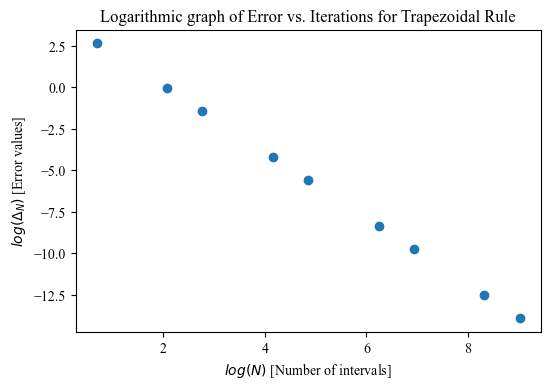

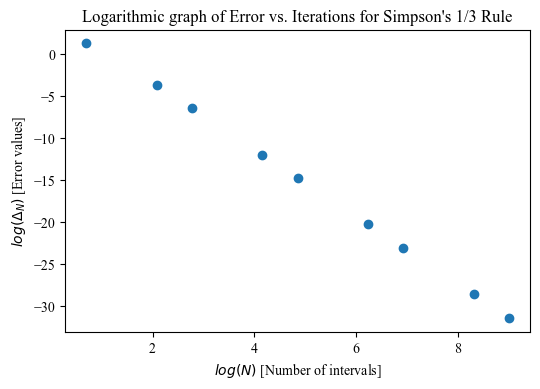

Slope of the graph produced by Trapezoidal rule:  -1.9933519898293859
Slope of the graph produced by Simpson's 1/3 rule:  -3.9623273894463313


In [50]:
plt.plot(np.log(N), np.log(trap_int_error), 'o')
plt.title("Logarithmic graph of Error vs. Iterations for Trapezoidal Rule")
plt.xlabel("$log(N)$ [Number of intervals]")
plt.ylabel("$log(\Delta_N)$ [Error values]")
plt.show()

plt.plot(np.log(N), np.log(simp_int_error), 'o')
plt.title("Logarithmic graph of Error vs. Iterations for Simpson's 1/3 Rule")
plt.xlabel("$log(N)$ [Number of intervals]")
plt.ylabel("$log(\Delta_N)$ [Error values]")
plt.show()

a,b = np.polyfit(np.log(N), np.log(trap_int_error),1) #polyfitting the trapezoidal error graph to find the value of "p"
print('Slope of the graph produced by Trapezoidal rule: ', a)
c, d = np.polyfit(np.log(N), np.log(simp_int_error),1) #polyfitting the simpson's error graph to find the value of "p"
print('Slope of the graph produced by Simpson\'s 1/3 rule: ', c)

As we can see, the slope of the graph is decreasing such that:
$$
\Delta_N=N^p
$$
where $p$ has to be negative in order to yield a decaying function.
Taking $\log$ on both side of the above equation,
$$
\ln \left(\Delta_N\right)=p \ln (N)
$$
Now, the graph follows a linear relatioship, and we can find $p$ by finding the slope of our graph, using np.polyfit() function. Using the function we found out that the value of slope for:
1. Trapezoid Rule: $m=-1.9933519898293859$, i.e., approaching $m=-2$ as we increase the number of iterations
2. Simpson's Rule: $m=-3.9623273894463313$, i.e., approaching $m=-4$ as we increase the number of iterations

Therefore, for Trapezoidal rule:
$\Delta_N=N^{2}$

For Simpson's 1/3 rule:
$\Delta_N=N^{4}$

# Question 2: Adaptive Integration

Integral approximation for epsilon = 0.01: 29.48762405197484, Iterations: 48
Integral approximation for epsilon = 0.001: 29.483176669450906, Iterations: 146
Integral approximation for epsilon = 0.0001: 29.482685070864523, Iterations: 464
Integral approximation for epsilon = 1e-05: 29.482637154805563, Iterations: 1506
Integral approximation for epsilon = 1e-06: 29.48263237842183, Iterations: 4582
Integral approximation for epsilon = 1e-07: 29.482631873699642, Iterations: 14704
Integral approximation for epsilon = 1e-08: 29.482631825862786, Iterations: 47618
Integral approximation for epsilon = 1e-09: 29.482631821074538, Iterations: 144271
Integral approximation for epsilon = 1e-10: 29.482631820568322, Iterations: 466163


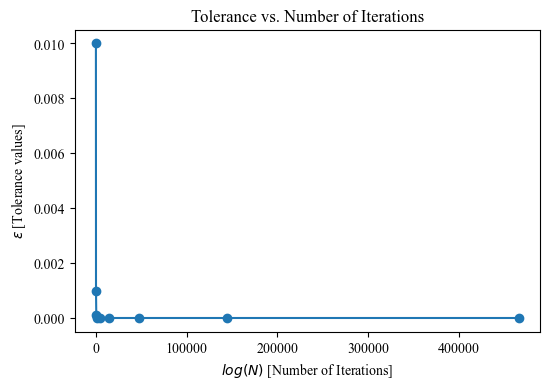

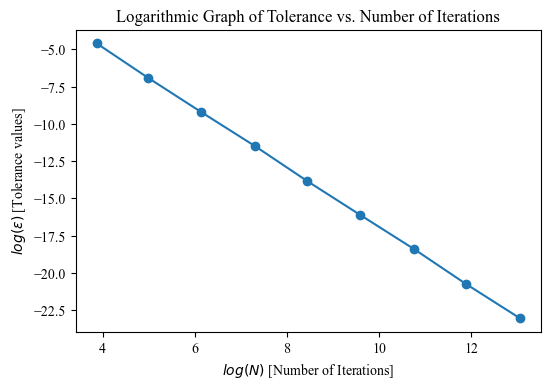

Slope of the graph produced by Adaptive Integration is :  -2.003561483552042


In [62]:
def integrate_adaptive(f, a, b, fa, fb, epsilon, max_depth=1000):
    # Midpoint and trapezoidal approximations
    m = (a + b) / 2
    fm = f(m)
    approx_mid = (fa + fb + 2 * fm) * (b - a) / 4
    approx_trap = (fa + fb) * (b - a) / 2

    # Estimate the error
    error = abs(approx_mid - approx_trap) / 3

    # If error is within tolerance or maximum depth is reached, return the approximation
    if error < epsilon or max_depth == 0:
        return approx_mid, 1

    # Recursive call for the left and right subintervals
    left_approx, left_iterations = integrate_adaptive(f, a, m, fa, fm, epsilon/2, max_depth-1)
    right_approx, right_iterations = integrate_adaptive(f, m, b, fm, fb, epsilon/2, max_depth-1)

    return left_approx + right_approx, left_iterations + right_iterations

# Define the integration interval
a = 0.0
b = 1.0

# Calculate function values at the endpoints to reduce function evaluations
fa = f(a)
fb = f(b)

# Set tolerance levels
epsilons = [1e-2, 1e-3 ,1e-4,1e-5 , 1e-6,1e-7 , 1e-8,1e-9 , 1e-10]

# Initialize lists to store the results
integral_results = []
iteration_counts = []

# Perform adaptive integration for each tolerance level
for epsilon in epsilons:
    integral, iterations = integrate_adaptive(f, a, b, fa, fb, epsilon)
    integral_results.append(integral)
    iteration_counts.append(iterations)

    print(f"Integral approximation for epsilon = {epsilon}: {integral}, Iterations: {iterations}")

# Plot the number of iterations vs epsilon
plt.plot(iteration_counts, epsilons, 'o-')
plt.title('Tolerance vs. Number of Iterations')
plt.ylabel('$\epsilon$ [Tolerance values]')
plt.xlabel('$log(N)$ [Number of Iterations]')
plt.show()

# Plot the logarithmic graph
plt.plot(np.log(iteration_counts),np.log(epsilons), 'o-')
plt.title('Logarithmic Graph of Tolerance vs. Number of Iterations')
plt.ylabel('$log(\epsilon)$ [Tolerance values]')
plt.xlabel('$log(N)$ [Number of Iterations]')
plt.show()

m,c = np.polyfit(np.log(iteration_counts),np.log(epsilons), 1)
print('Slope of the graph produced by Adaptive Integration is : ', m)

The slope of the graph apprpoaches $-2$ as the number of iterations is increased. This implies that $\epsilon = N^2$ as also seen in trapezoidal integration